In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Download historical stock data (e.g., Apple)
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data.head()

C:\Users\kingr\AppData\Local\Temp\ipykernel_6420\2643829489.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604328,24.137509,23.417716,24.057531,257142000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000


In [3]:
# Keep only the 'Close' column and convert dates
data = data[['Close']]
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

In [4]:
X = data[['Date_Ordinal']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = model.predict(X_test)

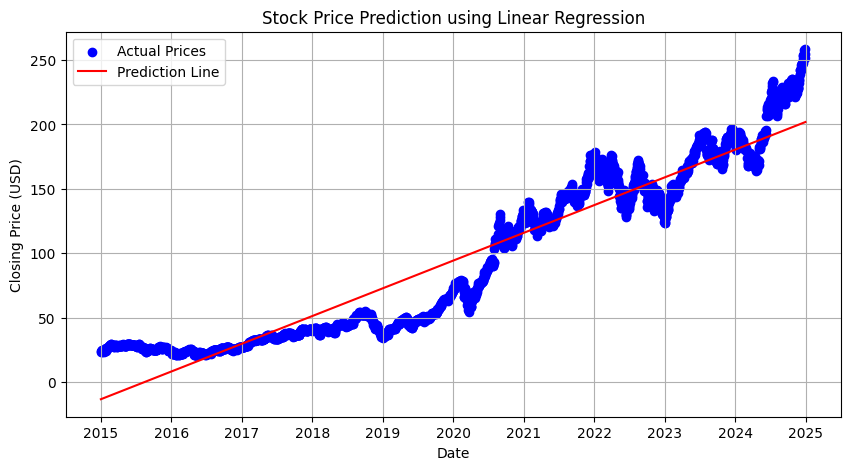

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Date'], y, color='blue', label="Actual Prices")
plt.plot(data['Date'], model.predict(X), color='red', label="Prediction Line")
plt.title("Stock Price Prediction using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))

Mean Squared Error (MSE): 413.8683456878546
R² Score: 0.9028890016908173
